In [1]:
from sklearn import datasets
data = datasets.load_diabetes()

In [2]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [3]:
import pandas as pd
df = pd.DataFrame(data.data,columns = data.feature_names)

In [5]:
df['target'] = pd.Series(data.target)

In [6]:
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [7]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     442 non-null    float64
 1   sex     442 non-null    float64
 2   bmi     442 non-null    float64
 3   bp      442 non-null    float64
 4   s1      442 non-null    float64
 5   s2      442 non-null    float64
 6   s3      442 non-null    float64
 7   s4      442 non-null    float64
 8   s5      442 non-null    float64
 9   s6      442 non-null    float64
 10  target  442 non-null    float64
dtypes: float64(11)
memory usage: 38.1 KB


In [10]:
df[df.duplicated()]

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target


In [11]:
y =df['target']
x = df.drop('target', axis = 1)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(x,y ,test_size=0.20,random_state= 0)

In [46]:
from sklearn.ensemble  import GradientBoostingRegressor
gb_regressor  = GradientBoostingRegressor(n_estimators= 500)

gb_regressor.fit(X_train,Y_train)

GradientBoostingRegressor(n_estimators=500)

In [47]:
y_pred = gb_regressor.predict(X_test)
print(y_pred)

[255.02101794 205.56289125 179.85705675 136.31592241 212.97766292
 226.13396728 105.417523   214.57708437 111.13373239 259.22463726
 197.96740644 148.62659692 122.49767269  93.72752111 308.01687012
 100.26761301 150.02611776  54.91654136  95.15159104 256.47059022
 152.89460864 127.54205669 187.25970754 146.55660359 214.60726378
 186.68199607 150.57499529  66.80739609 273.02793001 128.06668532
 210.54259921  81.59559227 150.79557459 158.11372079 152.0460288
 168.43173901 176.4382179  120.11136791  98.22209211 195.91362202
 119.29752099 146.24673218  94.68295302 183.96050259 153.01676467
  88.9211124  122.85298779 118.84166227  77.1481149  284.6065506
 142.93532308  47.75022918 133.24314078 164.55665853 241.48431364
 154.43792339 204.87884266 124.80532768  90.25600828 183.34060951
 250.28520018 156.79067317 125.6020672   80.12606311 267.07031196
 149.86257416  85.48633701 279.26817811 230.19812305 112.49619624
  84.83530803 144.36098797 133.06639333 125.82209324 135.41800498
 144.8449273

In [62]:
from sklearn.metrics import mean_absolute_error

mae =  mean_absolute_error(y_pred,Y_test)
print(mae)

TypeError: missing a required argument: 'y_true'

In [63]:
figure_scores = pd.Series(gbr.feature_importances_,index = X_train.columns).sort_values(ascending= False)

In [64]:
figure_scores

,0
s5,0.384787
bmi,0.213201
bp,0.093145
s2,0.078042
s6,0.055139
s3,0.052596
age,0.045713
s1,0.043299
s4,0.017892
sex,0.016186


Text(0, 0.5, 'Features')

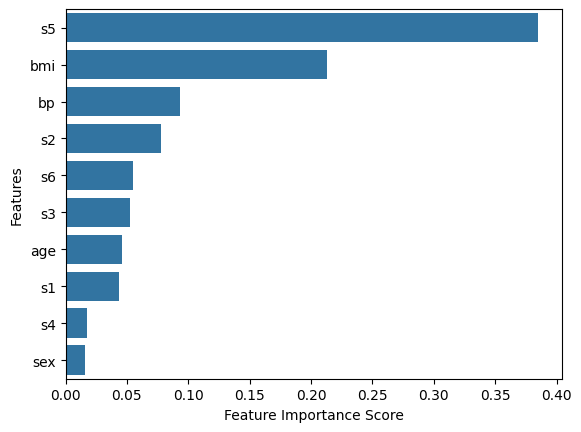

In [59]:
sns.barplot(x = figure_scores ,y= figure_scores.index)
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')

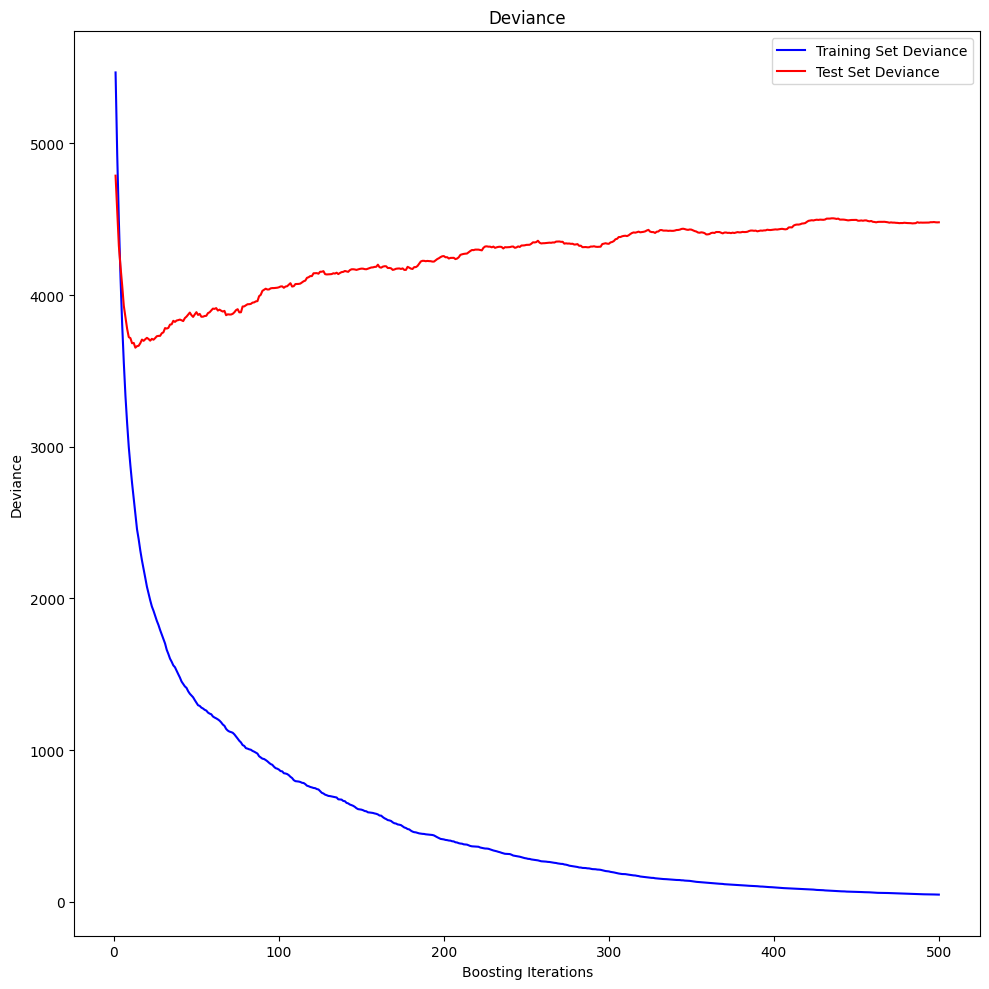

In [68]:

# Initialize array to hold test scores
test_scores = np.zeros(gb_regressor.n_estimators, dtype=np.float64)

# Compute test scores for each stage
for i, y_pred in enumerate(gb_regressor.staged_predict(X_test)):
    test_scores[i] = mean_squared_error(Y_test, y_pred)

# Plotting
fig = plt.figure(figsize=(10, 10))
plt.subplot(1, 1, 1)
plt.title('Deviance')
plt.plot(np.arange(1, gb_regressor.n_estimators + 1), gb_regressor.train_score_, 'b', label='Training Set Deviance')
plt.plot(np.arange(1, gb_regressor.n_estimators + 1), test_scores, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')
fig.tight_layout()
plt.show()
